In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from dateutil.parser import parse
import seaborn as sns
print("Block executed")

Block executed


In [2]:
hotel_df = pd.read_csv('/kaggle/input/hotel-booking-cancellation-prediction/booking.csv')
hotel_df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [3]:
hotel_df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [4]:
hotel_df.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [5]:
#for encoding
hotel_df['type of meal'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [6]:
hotel_df['room type'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [7]:
hotel_df['repeated'].unique()

array([0, 1])

In [8]:
hotel_df['P-C'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6])

In [9]:
hotel_df['P-not-C'].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36])

In [10]:
hotel_df['market segment type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [11]:
#checking null values
hotel_df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [12]:
hotel_df.loc[hotel_df['type of meal'] == "Meal Plan 1", 'type of meal'] = 1
hotel_df.loc[hotel_df['type of meal'] == "Not Selected", 'type of meal'] = 0
hotel_df.loc[hotel_df['type of meal'] == "Meal Plan 2", 'type of meal'] = 2
hotel_df.loc[hotel_df['type of meal'] == "Meal Plan 3", 'type of meal'] = 3
print("Block executed")

Block executed


In [13]:
hotel_df.loc[hotel_df['room type'] == "Room_Type 1", "room type"] = 1
hotel_df.loc[hotel_df['room type'] == "Room_Type 2", "room type"] = 2
hotel_df.loc[hotel_df['room type'] == "Room_Type 3", "room type"] = 3
hotel_df.loc[hotel_df['room type'] == "Room_Type 4", "room type"] = 4
hotel_df.loc[hotel_df['room type'] == "Room_Type 5", "room type"] = 5
hotel_df.loc[hotel_df['room type'] == "Room_Type 6", "room type"] = 6
hotel_df.loc[hotel_df['room type'] == "Room_Type 7", "room type"] = 7
print("Block executed")

Block executed


In [14]:
hotel_df.loc[hotel_df['market segment type'] == "Offline", "market segment type"] = 0
hotel_df.loc[hotel_df['market segment type'] == "Online", "market segment type"] = 1
hotel_df.loc[hotel_df['market segment type'] == "Corporate", "market segment type"] = 2
hotel_df.loc[hotel_df['market segment type'] == "Aviation", "market segment type"] = 3
hotel_df.loc[hotel_df['market segment type'] == "Complementary", "market segment type"] = 4
print("Block executed")

Block executed


In [15]:
hotel_df.loc[hotel_df['booking status'] == "Not_Canceled", "booking status"] = 0
hotel_df.loc[hotel_df['booking status'] == "Canceled", "booking status"] = 1
print("Block executed")

Block executed


In [16]:
pd.to_datetime(hotel_df['date of reservation'], format='%m/%d/%Y', errors='coerce')

0       2015-10-02
1       2018-11-06
2       2018-02-28
3       2017-05-20
4       2018-04-11
           ...    
36280   2018-09-13
36281   2017-10-15
36282   2018-12-26
36283   2018-07-06
36284   2018-10-18
Name: date of reservation, Length: 36285, dtype: datetime64[ns]

In [17]:
hotel_df.loc[hotel_df['date of reservation'] == "2018-2-29", "date of reservation"] = np.NaN
hotel_df.dropna(axis=0, how='any',inplace = True)

In [18]:
hotel_df["reservation year"] = pd.DatetimeIndex(hotel_df['date of reservation']).year
hotel_df["reservation month"] =  pd.DatetimeIndex(hotel_df['date of reservation']).month
hotel_df["reservation day"] =  pd.DatetimeIndex(hotel_df['date of reservation']).day

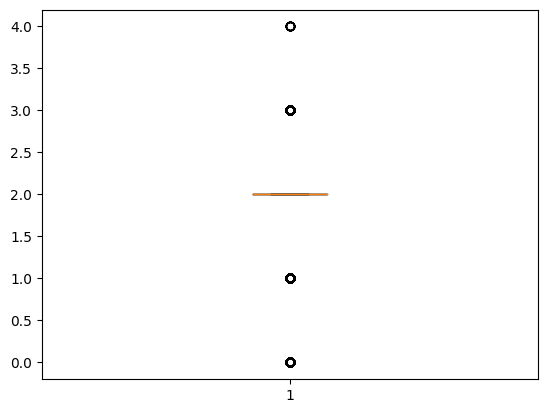

In [19]:
#finding outliers
plt.boxplot(hotel_df['number of adults'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number of adults', ylabel='Count'>

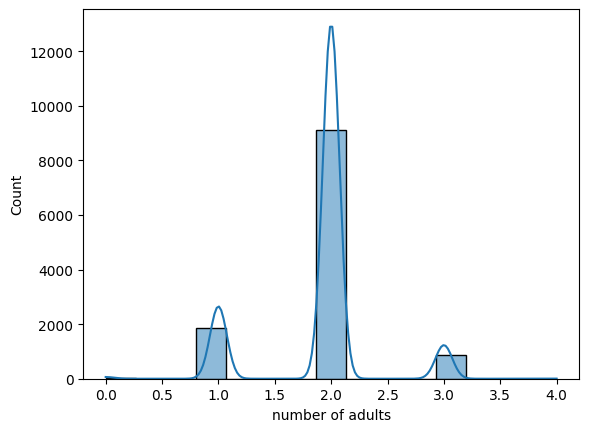

In [20]:
tp_plot = hotel_df[hotel_df['booking status'] == 1] ["number of adults"]
sns.histplot(tp_plot, kde = True)

In [21]:
q1 = hotel_df['number of adults'].quantile(0.25)
q3 = hotel_df['number of adults'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
hotel_df.loc[hotel_df['number of adults'] < lw, "number of adults"] = lw 
hotel_df.loc[hotel_df['number of adults'] > uw, "number of adults"] = uw
print("Block executed")

Block executed


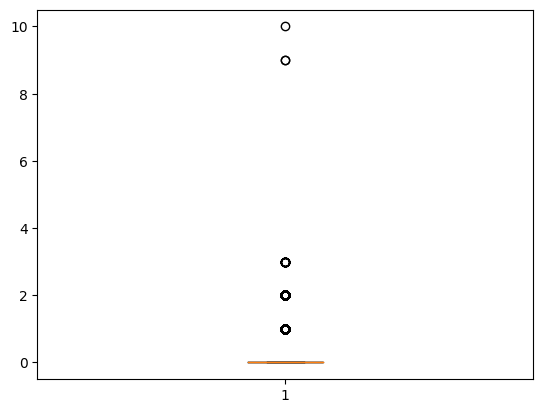

In [22]:
plt.boxplot(hotel_df['number of children'])
plt.show()

In [23]:
q1 = hotel_df['number of children'].quantile(0.25)
q3 = hotel_df['number of children'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
hotel_df.loc[hotel_df['number of children'] < lw, "number of children"] = lw 
hotel_df.loc[hotel_df['number of children'] > uw, "number of children"] = uw
print("Block executed")

Block executed


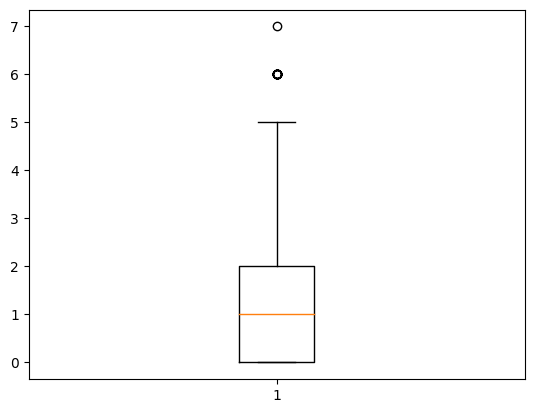

In [24]:
plt.boxplot(hotel_df['number of weekend nights'])
plt.show()

In [25]:
q1 = hotel_df['number of weekend nights'].quantile(0.25)
q3 = hotel_df['number of weekend nights'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
hotel_df.loc[hotel_df['number of weekend nights'] < lw, "number of weekend nights"] = lw 
hotel_df.loc[hotel_df['number of weekend nights'] > uw, "number of weekend nights"] = uw
print("Block executed")

Block executed


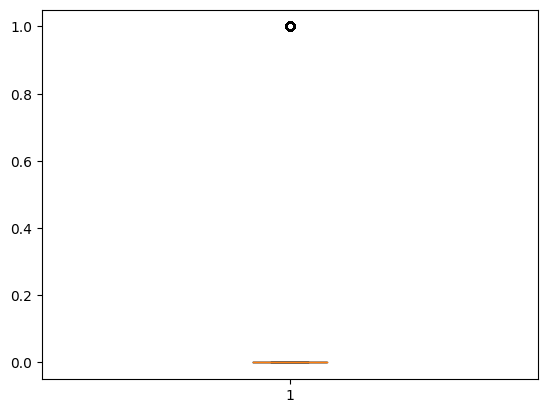

In [26]:
plt.boxplot(hotel_df['car parking space'])
plt.show()

In [27]:
q1 = hotel_df['car parking space'].quantile(0.25)
q3 = hotel_df['car parking space'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
hotel_df.loc[hotel_df['car parking space'] < lw, "car parking space"] = lw 
hotel_df.loc[hotel_df['car parking space'] > uw, "car parking space"] = uw
print("Block executed")

Block executed


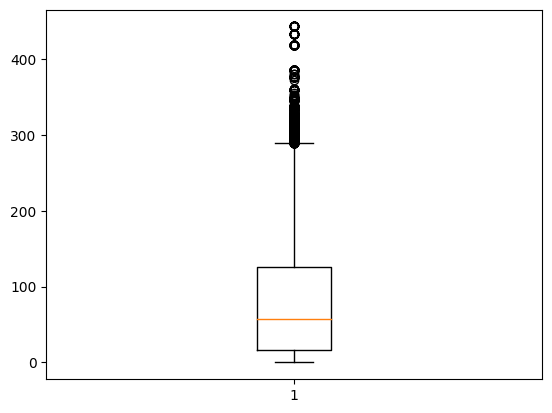

In [28]:
plt.boxplot(hotel_df['lead time'])
plt.show()

In [29]:
q1 = hotel_df['lead time'].quantile(0.25)
q3 = hotel_df['lead time'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
hotel_df.loc[hotel_df['lead time'] < lw, "lead time"] = lw 
hotel_df.loc[hotel_df['lead time'] > uw, "lead time"] = uw
print("Block executed")

Block executed


/tmp/ipykernel_33/1255550699.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-146.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hotel_df.loc[hotel_df['lead time'] < lw, "lead time"] = lw


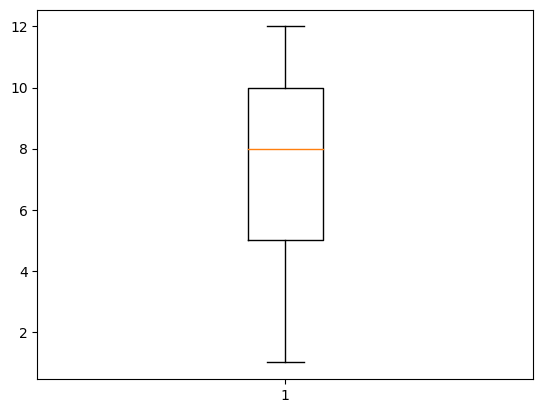

In [30]:
# a month is more important since it corresponds to vacations and holidays
plt.boxplot(hotel_df['reservation month'])
plt.show()

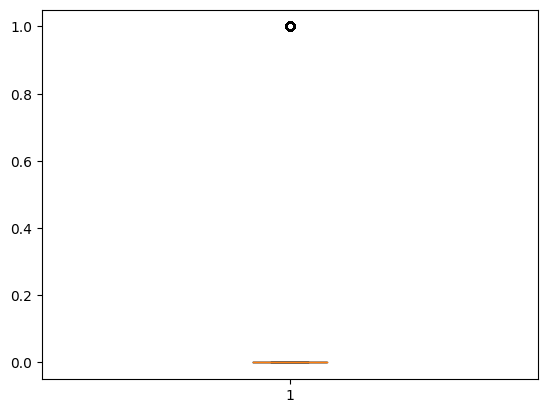

In [31]:
plt.boxplot(hotel_df['repeated'])
plt.show()

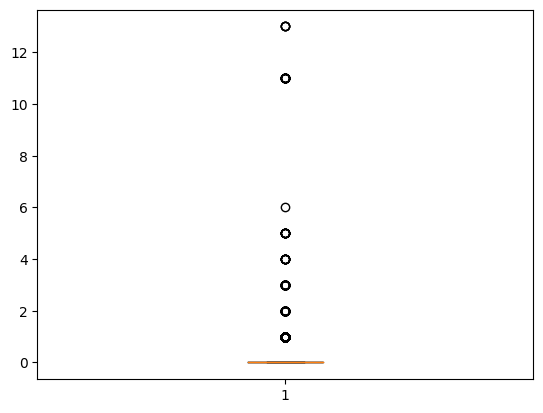

In [32]:
plt.boxplot(hotel_df['P-C'])
plt.show()

In [33]:
q1 = hotel_df['P-C'].quantile(0.25)
q3 = hotel_df['P-C'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
hotel_df.loc[hotel_df['P-C'] < lw, "P-C"] = lw 
hotel_df.loc[hotel_df['P-C'] > uw, "P-C"] = uw
print("Block executed")

Block executed


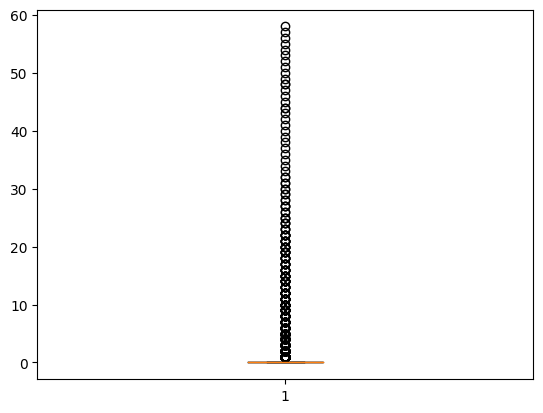

In [34]:
plt.boxplot(hotel_df['P-not-C'])
plt.show()

In [35]:
q1 = hotel_df['P-not-C'].quantile(0.25)
q3 = hotel_df['P-not-C'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
hotel_df.loc[hotel_df['P-not-C'] < lw, "P-not-C"] = lw 
hotel_df.loc[hotel_df['P-not-C'] > uw, "P-not-C"] = uw
print("Block executed")

Block executed


In [36]:
#Normalizing data (max-min normalization)


min_val = hotel_df['number of weekend nights'].min()
max_val = hotel_df['number of weekend nights'].max()
hotel_df['number of weekend nights'] = (hotel_df['number of weekend nights'] - min_val) / (max_val - min_val)

min_val = hotel_df['number of week nights'].min()
max_val = hotel_df['number of week nights'].max()
hotel_df['number of week nights'] = (hotel_df['number of week nights'] - min_val) / (max_val - min_val)

min_val = hotel_df['room type'].min()
max_val = hotel_df['room type'].max()
hotel_df['room type'] = (hotel_df['room type'] - min_val) / (max_val - min_val)

min_val = hotel_df['type of meal'].min()
max_val = hotel_df['type of meal'].max()
hotel_df['type of meal'] = (hotel_df['type of meal'] - min_val) / (max_val - min_val)

min_val = hotel_df['lead time'].min()
max_val = hotel_df['lead time'].max()
hotel_df['lead time'] = (hotel_df['lead time'] - min_val) / (max_val - min_val)

min_val = hotel_df['market segment type'].min()
max_val = hotel_df['market segment type'].max()
hotel_df['market segment type'] = (hotel_df['market segment type'] - min_val) / (max_val - min_val)

min_val = hotel_df['average price'].min()
max_val = hotel_df['average price'].max()
hotel_df['average price'] = (hotel_df['average price'] - min_val) / (max_val - min_val)

min_val = hotel_df['reservation year'].min()
max_val = hotel_df['reservation year'].max()
hotel_df['reservation year'] = (hotel_df['reservation year'] - min_val) / (max_val - min_val)

min_val = hotel_df['reservation day'].min()
max_val = hotel_df['reservation day'].max()
hotel_df['reservation day'] = (hotel_df['reservation day'] - min_val) / (max_val - min_val)

min_val = hotel_df['reservation month'].min()
max_val = hotel_df['reservation month'].max()
hotel_df['reservation month'] = (hotel_df['reservation month'] - min_val) / (max_val - min_val)

print("Block executed")

Block executed


In [37]:
hotel_df.dropna(axis=0, how='any')

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,reservation year,reservation month,reservation day
0,INN00001,2,0,0.4,0.294118,0.333333,0,0.0,0.773748,0.0,0,0,0,0.162963,0,10/2/2015,0,0.000000,0.818182,0.033333
1,INN00002,2,0,0.2,0.176471,0.0,0,0.0,0.017271,0.25,0,0,0,0.197556,1,11/6/2018,0,1.000000,0.909091,0.166667
2,INN00003,2,0,0.2,0.176471,0.333333,0,0.0,0.003454,0.25,0,0,0,0.092593,0,2/28/2018,1,1.000000,0.090909,0.900000
3,INN00004,2,0,0.0,0.117647,0.333333,0,0.0,0.728843,0.25,0,0,0,0.185185,1,5/20/2017,1,0.666667,0.363636,0.633333
4,INN00005,2,0,0.2,0.117647,0.0,0,0.0,0.165803,0.25,0,0,0,0.142593,0,4/11/2018,1,1.000000,0.272727,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0.0,0.117647,0.666667,0,0.0,1.000000,0.25,0,0,0,0.212963,1,9/13/2018,1,1.000000,0.727273,0.400000
36281,INN36283,2,0,0.2,0.176471,0.333333,0,0.0,0.117444,0.25,0,0,0,0.199167,1,10/15/2017,0,0.666667,0.818182,0.466667
36282,INN36284,2,0,0.2,0.176471,0.333333,0,0.5,0.286701,0.25,0,0,0,0.195574,1,12/26/2018,0,1.000000,1.000000,0.833333
36283,INN36285,2,0,0.0,0.235294,0.333333,0,0.0,0.417962,0.0,0,0,0,0.179444,1,7/6/2018,0,1.000000,0.545455,0.166667


In [38]:
from imblearn.over_sampling import RandomOverSampler

def datasetSampler(dataframe,oversample=False):
  x=hotel_df[['number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests','reservation year','reservation month','reservation day']]   #Splits the dataframe consisting of all the columns other than the output column.
  y=hotel_df['booking status'].astype('int64')   #Splits the dataframe into the result column

  if oversample:                      #This is used to over sample in case a certain result has lesser data points in the given dataset
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))    #hstack() is used to stack the input columns and output column in a horizontal manner.
                                              #Also since x is 2 dimensional and y is single dimension we need to reshape the dimension of y for hstack() to work.

  return data,x,y

data,X,Y=datasetSampler(hotel_df,True)

In [39]:
hotel_df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
reservation year            0
reservation month           0
reservation day             0
dtype: int64

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,stratify=Y,test_size=0.2)

In [52]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=9) 
knn_model.fit(X_train,Y_train)    
     

KNeighborsClassifier(n_neighbors=9)

In [53]:
Y_pred=knn_model.predict(X_test)
print(Y_pred)

[0 0 1 ... 0 0 1]


In [54]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4873
           1       0.83      0.87      0.85      4874

    accuracy                           0.85      9747
   macro avg       0.85      0.85      0.85      9747
weighted avg       0.85      0.85      0.85      9747



In [55]:
confusion_matrix(Y_test,Y_pred)

array([[4011,  862],
       [ 646, 4228]])

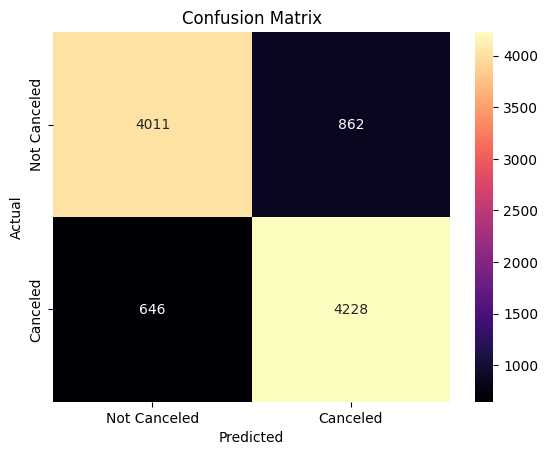

In [57]:
cm=confusion_matrix(Y_test,Y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()